In [22]:
import sklearn
import random
import numpy as np
import pandas as pd
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from tqdm.notebook import tqdm
from agents import stats, Agent
from model_builder import Item, ModelBuilder
from create_dataset import *
import seaborn as sns

In [78]:
Y = np.load('targets_v3_material.npy')
X = np.load('values_v3_material.npy')

array([52., 38., 40., 46., 57., 54., 25., 54., 25., 49., 47., 52., 49.,
       21., 44., 48., 97., 49., 58., 44., 46., 44., 59., 37.])

In [92]:
s = create_sample(profit = False, material = False, hours = False, costs= False,  factor_resources= 1)
target = s['wood']+s['metal']
Y[0] = target
in_var = compute_variables(s)
X[0] = in_var


In [93]:
# Solve with linear regression
model_linear = LinearRegression()

# Solve with decision tree
model_decision_tree = DecisionTreeRegressor()

# Solve with K-Neighbors regression
model_k_neighbors = KNeighborsRegressor()
#model.fit(X, Y)

# Comparing the different models with 10-fold-cross-validation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Validation of linear model
n_scores_linear = cross_val_score(model_linear, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
n_scores_linear = np.absolute(n_scores_linear)

# validation of decision tree
n_scores_decision_tree = cross_val_score(model_decision_tree, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
n_scores_decision_tree = np.absolute(n_scores_decision_tree)

# validation of k neighbors
n_scores_k_neighbors = cross_val_score(model_k_neighbors, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
n_scores_k_neighbors = np.absolute(n_scores_k_neighbors)

print('MAE Linear Model: %.3f (%.3f)' % (np.mean(n_scores_linear), np.std(n_scores_linear)))
print('MAE Decision Tree Model: %.3f (%.3f)' % (np.mean(n_scores_decision_tree), np.std(n_scores_decision_tree)))
print('MAE Nearest Neighbors: %.3f (%.3f)' % (np.mean(n_scores_k_neighbors), np.std(n_scores_k_neighbors)))

MAE Linear Model: 17.799 (0.059)
MAE Decision Tree Model: 22.862 (0.120)
MAE Nearest Neighbors: 18.645 (0.064)


In [94]:
model_linear.fit(X, Y)

LinearRegression()

In [95]:
def get_material_pred(coef = 'full'):
    if coef == 'original':
        
        orig_wood =[52,38,40,46,57,54,25,54,25,49,47,52]
        orig_metal = [49,21,44,48,97,49,58,44,46,44,59,37]
        wood = [int(w*factor_resources) for w in orig_wood]
        metal = [int(w*factor_resources) for w in orig_metal]
        return wood, metal
    input_c = [0.6633249580710799,0.5678459118386225,0.7147909614890431,0.5577940795416316,0.3333333333333333,1.1055415967851332,
 0.447213595499958,0.3333333333333333,0.4723774929733302,0.3333333333333333,1.0,0.23570226039551587,1.0606601717798212,
 0.6492207662311682,0.4723774929733302,0.8672174558335869]
    

    if coef == 'rounded':
        input_c = [np.round(c, 2) for c in input_c]
    m = np.round(model_linear.predict([input_c]))[0]
#print(m)
    m = m.astype(int)
    m = list(m)
    if 0 in m:
        m[m.index(0)] = 1
   # chair_profit = [m.pop(0) for i in range(12)]
   # table_profit = [m.pop(0) for i in range(12)]
   # bed_profit = [m.pop(0) for i in range(12)]
   # bookcase_profit = [m.pop(0) for i in range(12)]
    wood = [m.pop(0) for i in range(12)]
    metal = [m.pop(0) for i in range(12)]  

    print( 'Wood: ' + str(wood))
    print( 'Metal: ' + str(metal))
    return wood, metal

## Evaluation of Trial Parameters with agents


In [115]:
factor_resources = 1
chair_profit = [2,3,2,2,3,1,2,2,2,2,3,2]    #random.choices(range(1,4), k=12) 
table_profit =[ 4,4,4,5,4,3,4,3,4,4,5,3] #random.choices(range(2,7), k=12) 
bed_profit =[4,7,3,5,5,5,7,5,5,4,4,6] #random.choices(range(3,8), k=12) 
bookcase_profit = [7,8,6,8,10,7,7,7,10,9,8,10]#random.choices(range( 5,11), k=12) 

        # define the items:
chair = Item(costs_wood=4,costs_metal=1,costs_time_one=4,costs_time_two=1,profit=chair_profit)
table = Item(2,5,4,6,table_profit)
bed = Item(4,3,3,4, bed_profit)
bookcase = Item(5,7,5,3,bookcase_profit)

        # Making calculations for one year
months = 12
        # specifying available materials
hours_a =int(26*factor_resources)
hours_b = int(30*factor_resources)
hours_c = int(23*factor_resources)
hours_d = int(26*factor_resources)
#orig_wood =[52,38,40,46,57,54,25,54,25,49,47,52]
#orig_metal = [49,21,44,48,97,49,58,44,46,44,59,37]
#wood = [int(w*factor_resources) for w in orig_wood]
#metal = [int(w*factor_resources) for w in orig_metal]
#

wood, metal = get_material_pred(coef = 'full')
test_model = ModelBuilder(12, wood, metal, hours_a,hours_b,hours_c,hours_d,chair,table,bed,bookcase)
test_model = test_model.build_model()

Wood: [74, 39, 67, 77, 67, 74, 52, 74, 44, 62, 68, 53]
Metal: [69, 37, 59, 52, 67, 58, 45, 70, 48, 57, 65, 56]
Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 0.000000 after 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 1 rows and 0 columns.
MIP Presolve modified 41 coefficients.
Reduced MIP has 71 rows, 48 columns, and 188 nonzeros.
Reduced MIP has 0 binaries, 48 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.11 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 65 rows and 44 columns.
Reduced MIP has 6 rows, 4 columns, and 16 nonzeros.
Reduced MIP has 0 binaries, 4 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.04 ticks)
Tried aggregator 1 time.
Reduced MIP has 6 rows, 4 columns, and 16 nonzeros.
Reduced MIP has 0 binaries, 4 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.01 ticks)
MIP emphasis: balance optimality and f

In [99]:
from agents import MarginProfitAgent
from agents import ExpensiveMaterialAgent
from agents import NaiveProfitAgent

In [116]:
margin_agent = MarginProfitAgent(test_model)
margin_agent.simulate_year()
naive_agent = NaiveProfitAgent(test_model)
naive_agent.simulate_year()
expensive_agent = ExpensiveMaterialAgent(test_model)
expensive_agent.simulate_year()

#margin_agent.plot_profits()
#expensive_agent.plot_profits()
#naive_agent.plot_profits()
optimum = naive_agent.optimal_solution.profits
df_sol = pd.DataFrame([naive_agent.profits, margin_agent.profits, expensive_agent.profits, optimum], 
                      index = ['naive','margin','expensive', 'optimum'])

df_sol = df_sol.transpose()
df_sol = df_sol.melt(value_name = 'solutions' ,ignore_index=False)
df_sol['month'] = df_sol.index+1
df_sol.index =  range(len(df_sol.index))
df_sol = df_sol.rename(columns={"variable": "Agent"})
sum(optimum)

689

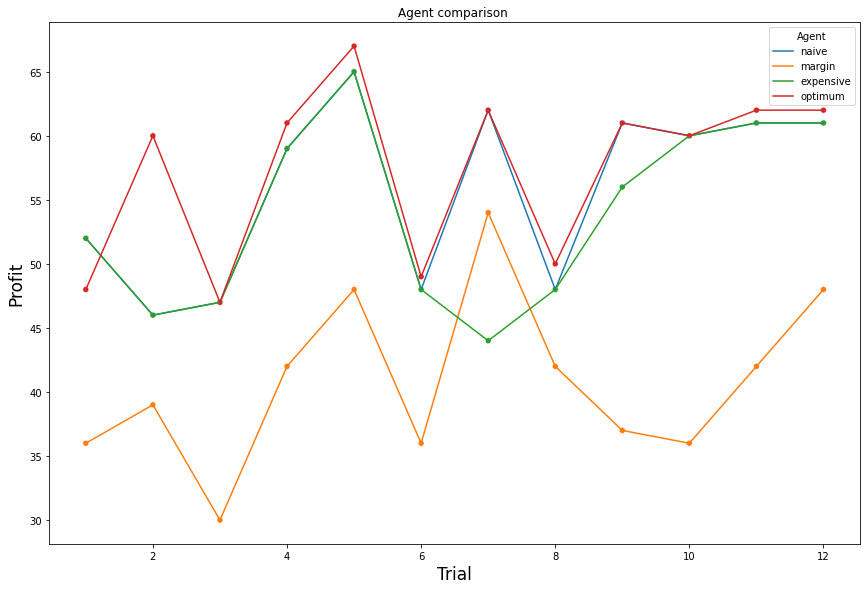

In [111]:
fig = plt.figure(figsize=(12, 8))
plt.title('Agent comparison ')

fig.tight_layout()

g = sns.lineplot(data = df_sol,
          x= 'month', y = 'solutions',hue = 'Agent')
g = sns.scatterplot(data = df_sol,
          x= 'month', y = 'solutions',hue = 'Agent', legend = False)

xlabel = plt.xlabel('Trial', fontsize = 17)
ylabel = plt.ylabel('Profit', fontsize = 17)

<AxesSubplot:title={'center':'Percentage under optimal solution'}, xlabel='month', ylabel='difference'>

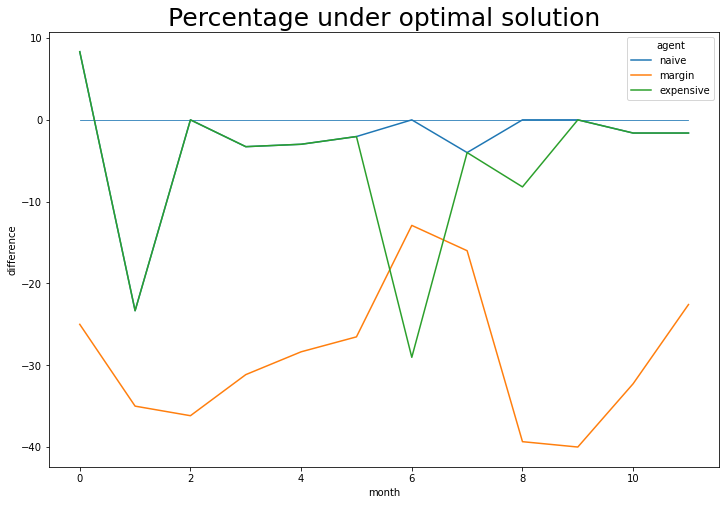

In [112]:

fig = plt.figure(figsize=(12, 8))
plt.title('Percentage under optimal solution', fontsize = 25)


diff_naive = [((naive_agent.profits[i]/optimum[i])-1)*100 for i in range(12)]
diff_margin = [((margin_agent.profits[i]/optimum[i])-1)*100 for i in range(12)]
diff_exp = [((expensive_agent.profits[i]/optimum[i])-1)*100 for i in range(12)]
df_sol = pd.DataFrame([diff_naive, diff_margin, diff_exp], 
                      index = ['naive','margin','expensive'])
df_sol = df_sol.melt(value_name = 'difference' ,ignore_index=False)
df_sol['agent'] = df_sol.index

df_sol.index =  range(len(df_sol.index))
df_sol = df_sol.rename(columns={"variable": "month"})
sns.lineplot(x=list(range(12)),y=np.zeros(12), linewidth = 0.8)
sns.lineplot(data = df_sol,x='month', y = 'difference', hue = 'agent')
#xlabel = plt.xlabel('Month', fontsize = 17)
#ylabel = plt.ylabel('Percentage under optimal', fontsize = 17)

#fig.savefig('Images/difference_to_optimal.png',bbox_inches='tight')
